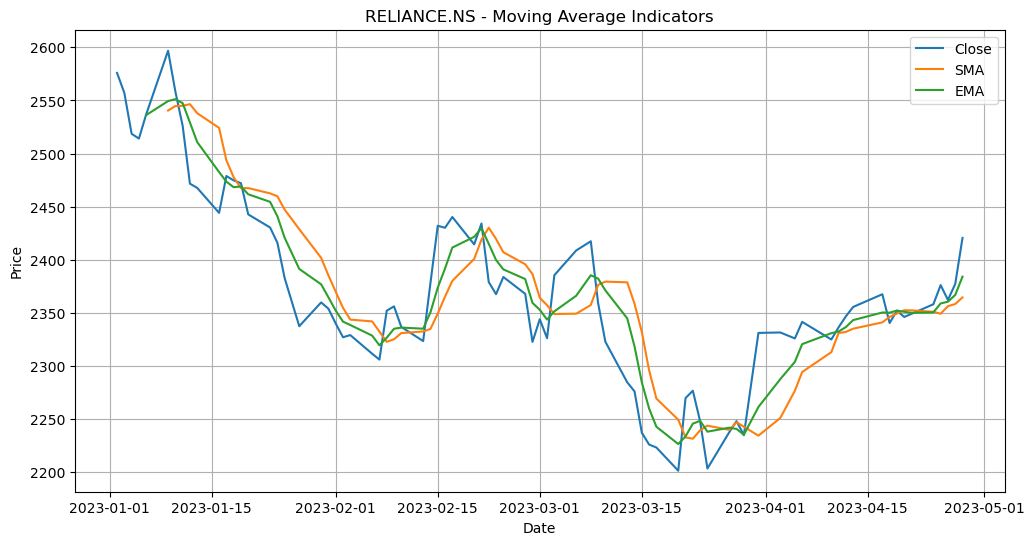

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

company_name = "RELIANCE.NS"  
data = yf.download(company_name, start="2023-01-01", end="2023-04-30", progress=False)

close_prices = data["Close"]

sma_period = 5 

sma_values = np.empty_like(close_prices)
sma_values[:sma_period] = np.nan

for i in range(sma_period, len(close_prices)):
    sma_values[i] = np.mean(close_prices[i - sma_period : i])

data["SMA"] = sma_values

ema_period = 5  

weights = np.exp(-np.arange(ema_period) / ema_period)
weights /= np.sum(weights)

ema_values = np.convolve(close_prices, weights, mode="full")[: len(close_prices)]
ema_values[:ema_period - 1] = np.nan

data["EMA"] = ema_values

plt.figure(figsize=(12, 6))
plt.plot(data["Close"], label="Close")
plt.plot(data["SMA"], label="SMA")
plt.plot(data["EMA"], label="EMA")
plt.xlabel("Date")
plt.ylabel("Price")
plt.title(f"{company_name} - Moving Average Indicators")
plt.legend()
plt.grid(True)
plt.show()



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

# Choose a NIFTY 50 stock and download its Yahoo Finance data
company_name = "RELIANCE.NS"  # Replace with the desired stock symbol
data = yf.download(company_name, start="2023-01-01", end="2023-04-30", progress=False)
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-02,2550.000000,2579.000000,2548.199951,2575.899902,2575.899902,2453414
2023-01-03,2565.050049,2573.000000,2547.800049,2557.050049,2557.050049,3534596
2023-01-04,2557.000000,2561.050049,2514.000000,2518.550049,2518.550049,4275746
2023-01-05,2523.500000,2536.399902,2504.000000,2514.050049,2514.050049,6293519
2023-01-06,2526.649902,2547.949951,2518.300049,2536.899902,2536.899902,2930338
...,...,...,...,...,...,...
2023-04-24,2375.000000,2380.899902,2348.000000,2358.000000,2358.000000,5970048
2023-04-25,2366.000000,2380.600098,2350.500000,2376.050049,2376.050049,4262471
2023-04-26,2379.000000,2386.100098,2354.050049,2362.100098,2362.100098,3977129
